### Class practice on 30/07/2024 - Advanced python programming
##### Prajwal Luitel (C0927658)

#### seaborn

In [1]:
import seaborn as sns

In [3]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<Axes: xlabel='Day', ylabel='Frequency'>

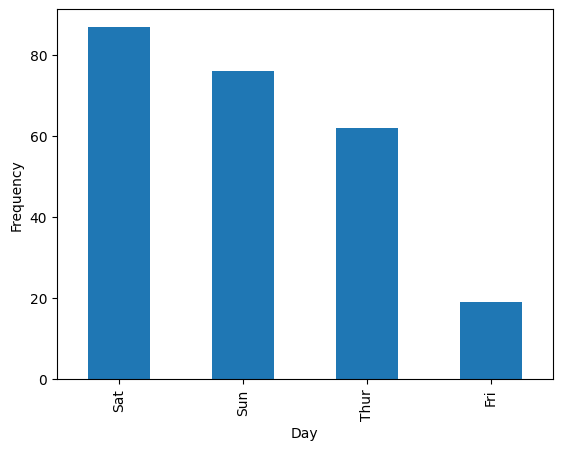

In [12]:
tips['day'].value_counts().plot(kind='bar', xlabel='Day', ylabel='Frequency')

In [13]:
import plotly.express as px

In [21]:
px.bar(data_frame=tips, x = "day", y='tip', color='time')

In [23]:
tips_grouped = tips.groupby(['day', 'time']).sum('tip').reset_index()
tips_grouped

/var/folders/6x/_cgtd_2j2qj3m9pv_1lyx7040000gp/T/ipykernel_20103/3928203511.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,day,total_bill,tip,size
0,Thur,1096.33,171.83,152
1,Fri,325.88,51.96,40
2,Sat,1778.40,260.40,219
3,Sun,1627.16,247.39,216


In [24]:
px.bar(data_frame=tips_grouped, x = "day", y='tip')


In [25]:
tips_grouped = tips.groupby(['day']).sum('tip').reset_index()
tips_grouped

/var/folders/6x/_cgtd_2j2qj3m9pv_1lyx7040000gp/T/ipykernel_20103/664407653.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,day,time,total_bill,tip,size
0,Thur,Lunch,1077.55,168.83,150
1,Thur,Dinner,18.78,3.00,2
2,Fri,Lunch,89.92,16.68,14
3,Fri,Dinner,235.96,35.28,26
4,Sat,Lunch,0.00,0.00,0
5,Sat,Dinner,1778.40,260.40,219
6,Sun,Lunch,0.00,0.00,0
7,Sun,Dinner,1627.16,247.39,216


In [26]:
px.bar(data_frame=tips_grouped, x = "day", y='tip', color='time')

In [27]:
px.scatter(data_frame=tips, x='total_bill', y='tip', color='day')

In [28]:
iris_data = px.data.iris()
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [29]:
px.scatter(data_frame=iris_data, x='sepal_length', y = 'petal_length', color='species')

## Linear regression with seaborn

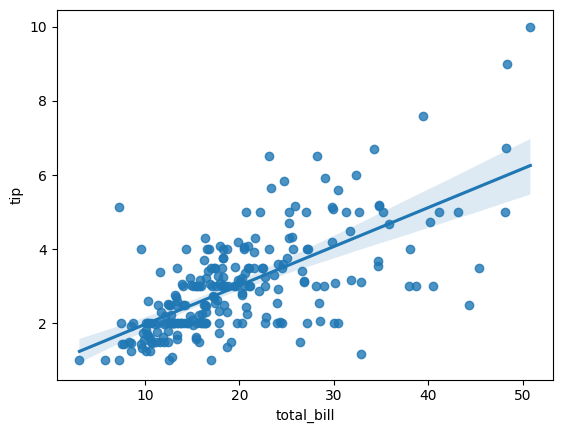

In [32]:
p =sns.regplot(data=tips, x='total_bill', y='tip')

In [33]:
p.get_lines()[0].get_xdata()
p.get_lines()[0].get_ydata()

array([1.24269488, 1.29334004, 1.34398519, 1.39463035, 1.44527551,
       1.49592066, 1.54656582, 1.59721098, 1.64785613, 1.69850129,
       1.74914644, 1.7997916 , 1.85043676, 1.90108191, 1.95172707,
       2.00237222, 2.05301738, 2.10366254, 2.15430769, 2.20495285,
       2.25559801, 2.30624316, 2.35688832, 2.40753347, 2.45817863,
       2.50882379, 2.55946894, 2.6101141 , 2.66075925, 2.71140441,
       2.76204957, 2.81269472, 2.86333988, 2.91398504, 2.96463019,
       3.01527535, 3.0659205 , 3.11656566, 3.16721082, 3.21785597,
       3.26850113, 3.31914628, 3.36979144, 3.4204366 , 3.47108175,
       3.52172691, 3.57237207, 3.62301722, 3.67366238, 3.72430753,
       3.77495269, 3.82559785, 3.876243  , 3.92688816, 3.97753331,
       4.02817847, 4.07882363, 4.12946878, 4.18011394, 4.2307591 ,
       4.28140425, 4.33204941, 4.38269456, 4.43333972, 4.48398488,
       4.53463003, 4.58527519, 4.63592034, 4.6865655 , 4.73721066,
       4.78785581, 4.83850097, 4.88914613, 4.93979128, 4.99043

In [34]:
import scipy

slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

In [35]:
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 0.10502451738435331, Intercept: 0.9202696135546753


In [36]:
df = px.data.tips()

In [38]:
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols", trendline_color_override="red")
fig.show()